# INFO 7390 Assignment1 Work Example 
<b>Name: Weijia Yan
<br>
NUID: 002292050</b>

## Understanding Dataset

This dataset provides valuable insights into customer responses to marketing campaigns, helping us understand the factors that influence customer engagement. It includes information on demographics, purchasing behavior, and past interactions with marketing campaigns. The demographic attributes consist of the customer’s year of birth, education level, marital status, and household size, including the number of children and teenagers. Purchasing behavior is captured through features such as the amount spent on various product categories like wines and gold products, as well as the number of purchases made through different channels, including web and in-store transactions. Additionally, the dataset includes marketing engagement metrics, such as the number of days since the customer’s last purchase, previous campaign acceptance history, and complaint records. Financial factors, such as customer income, are also considered.

By analyzing these factors, we can identify patterns that influence a customer’s likelihood to accept a marketing offer. This understanding enables businesses to optimize their marketing strategies, target the right audience more effectively, and enhance customer engagement. Furthermore, these insights support data-driven decision-making in developing personalized marketing approaches, improving customer retention, and maximizing revenue by focusing on the most responsive customer segments.


### Data Loading and Exploration  

This section loads the dataset and performs an **initial check** for missing values, data types, and basic statistics.  
Understanding the data structure helps us decide necessary **preprocessing steps** before model training.  


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
file_path = "marketing_campaign.csv"
df = pd.read_csv(file_path)
df = pd.read_csv(file_path, sep='\t')

# print basic info
print(df.info())
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values Summary:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [109]:
# Fill missing values in Income with the median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Verify that missing values are handled
print("Missing values after handling:")
print(df.isnull().sum().sum())  # Should be 0 if all missing values are handled


Missing values after handling:
0


In [111]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Year'] = 2025 - df['Dt_Customer'].dt.year  # Compute years since enrollment
df = df.drop(columns=['Dt_Customer'])  # Drop the original date column


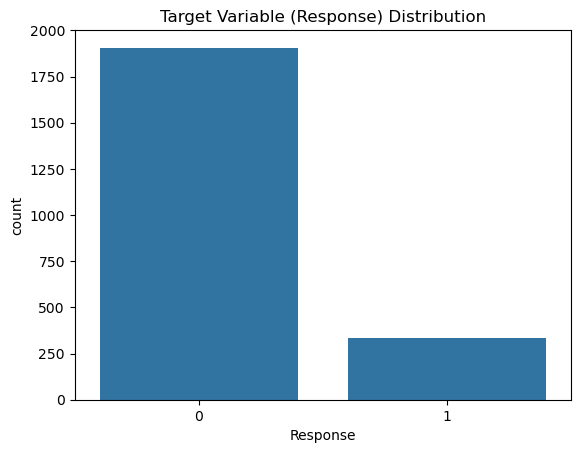

In [113]:
sns.countplot(x=df['Response'])
plt.title("Target Variable (Response) Distribution")
plt.show()


### Encoding Categorical Variables  

Since machine learning models require **numerical inputs**, we convert **categorical variables** (e.g., Education, Marital Status) into numerical values.  
This transformation is essential for ensuring that our model correctly interprets categorical data.  


In [116]:
from sklearn.preprocessing import LabelEncoder

# List categorical columns
categorical_cols = ['Education', 'Marital_Status']

# Apply Label Encoding
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

print("Categorical columns after encoding:")
print(df[categorical_cols].head())


Categorical columns after encoding:
   Education  Marital_Status
0          2               4
1          2               4
2          2               5
3          2               5
4          4               3


### Feature Scaling  

Some machine learning models **perform better** when numerical values are on a **similar scale**.  
Here, we apply **Standardization or Normalization** to ensure consistency in feature distributions.  


In [119]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding Response)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Response')

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical columns after scaling:")
print(df[numerical_cols].head())


Numerical columns after scaling:
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020999   -0.985345  -0.350141        0.251004  0.235696 -0.825218   
1 -1.053058   -1.235733  -0.350141        0.251004 -0.235454  1.032559   
2 -0.447070   -0.317643  -0.350141        1.180340  0.773999 -0.825218   
3  0.181716    1.268149  -0.350141        1.180340 -1.022355  1.032559   
4 -0.082614    1.017761   1.428354       -0.678332  0.241888  1.032559   

   Teenhome   Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0 -0.929894  0.307039  0.983781   1.551577  ...          -0.550785   
1  0.906934 -0.383664 -0.870479  -0.636301  ...          -1.166125   
2 -0.929894 -0.798086  0.362723   0.570804  ...           1.295237   
3 -0.929894 -0.798086 -0.870479  -0.560857  ...          -0.550785   
4 -0.929894  1.550305 -0.389085   0.419916  ...           0.064556   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0           0.693904 

In [121]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df.drop(columns=['Response'])
y = df['Response']

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
Response
1    1906
0    1906
Name: count, dtype: int64


### Exploratory Data Analysis (EDA)  

We explore **relationships between key variables** using visualizations such as **histograms, boxplots, and scatter plots**.  

In [124]:
main_df = pd.read_csv("marketing_campaign.csv", sep="\t")
main_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [126]:
main_df=main_df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
main_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


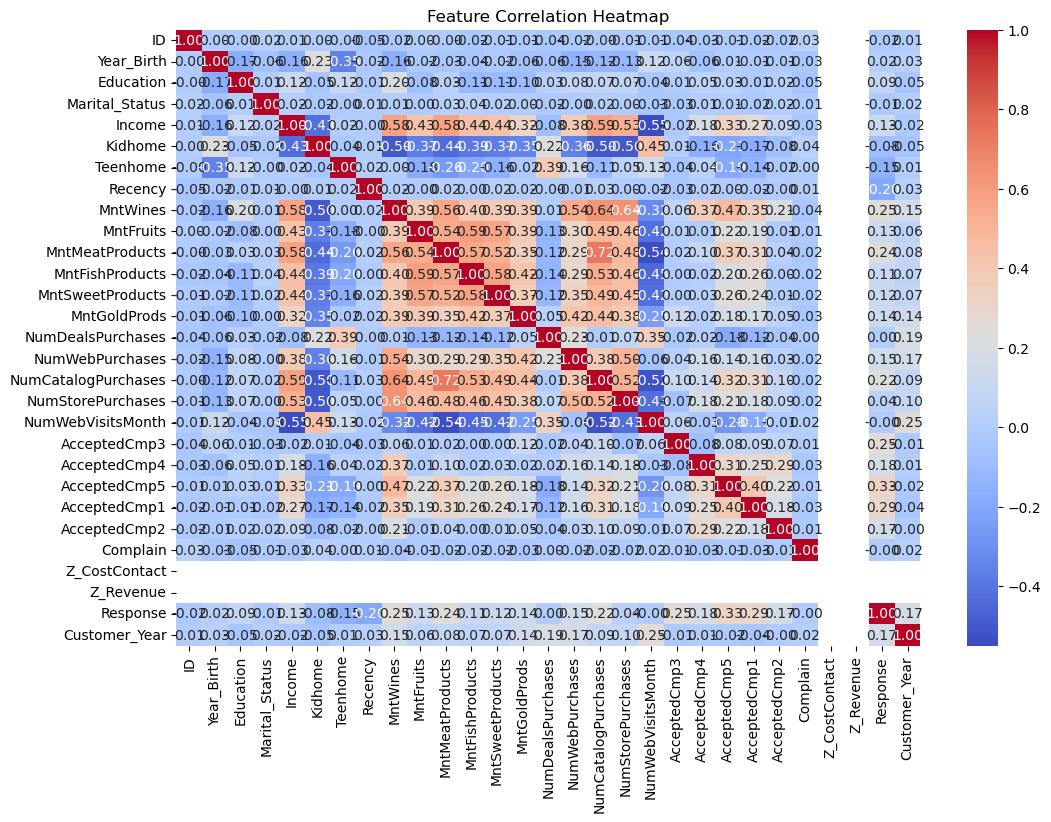

In [128]:
# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


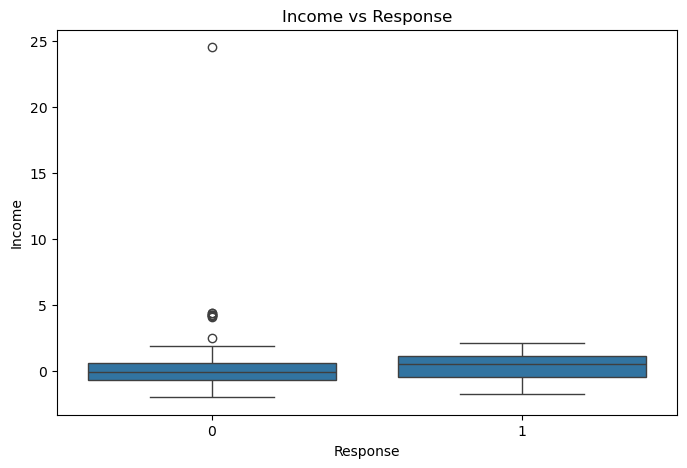

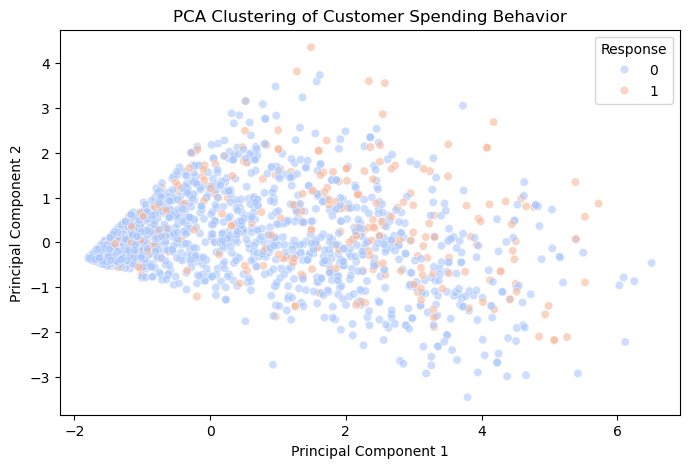

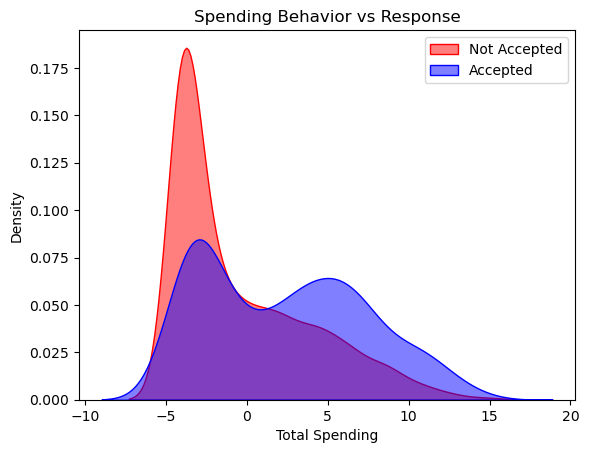

In [129]:
# Boxplot: Income vs. Response
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Response'], y=df['Income'])
plt.title("Income vs Response")
plt.show()

from sklearn.decomposition import PCA

# Selecting only spending-related features
spending_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Applying PCA (2 components for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[spending_features])

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Response'] = df['Response']

# Scatter plot of PCA components
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Response'], palette="coolwarm", alpha=0.6)
plt.title("PCA Clustering of Customer Spending Behavior")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Response")
plt.show()


# Creating a total spending feature
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# KDE plot for spending behavior
sns.kdeplot(df[df['Response'] == 0]['Total_Spending'], label="Not Accepted", fill=True, color='red', alpha=0.5)
sns.kdeplot(df[df['Response'] == 1]['Total_Spending'], label="Accepted", fill=True, color='blue', alpha=0.5)

plt.title("Spending Behavior vs Response")
plt.xlabel("Total Spending")
plt.ylabel("Density")
plt.legend()
plt.show()


In [130]:
# Dropping highly correlated features to reduce redundancy
df = df.drop(columns=['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'])
# Capping Income outliers (setting upper limit at 95th percentile)
income_cap = df['Income'].quantile(0.95)
df['Income'] = np.where(df['Income'] > income_cap, income_cap, df['Income'])


### Train-Test Split & Data Balancing  

To evaluate model performance, we **split the dataset** into training and testing sets.  
If the dataset is **imbalanced**, we apply **SMOTE** to ensure fair representation of both classes.  


In [132]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define X (features) and y (target variable)
X = df.drop(columns=['Response'])
y = df['Response']

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 3049
Testing set size: 763


### Model Training  

We train multiple machine learning models, including:  
- **Logistic Regression** (Baseline Model)  
- **Random Forest** (Ensemble Learning)  
- **Gradient Boosting** (Strong Predictive Power)  

Each model **learns patterns** in the dataset and makes predictions.  


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Logistic Regression Accuracy: 0.799475753604194
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       382
           1       0.80      0.81      0.80       381

    accuracy                           0.80       763
   macro avg       0.80      0.80      0.80       763
weighted avg       0.80      0.80      0.80       763

Random Forest Accuracy: 0.9541284403669725
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       382
           1       0.95      0.96      0.95       381

    accuracy                           0.95       763
   macro avg       0.95      0.95      0.95       763
weighted avg       0.95      0.95      0.95       763

Gradient Boosting Accuracy: 0.9292267365661862
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       382
           1       0.93      0.93      0.93       381

    accuracy                           0.93 

### Model Evaluation  

We assess model performance using:  
- **Accuracy & F1-score**  
- **Confusion Matrix**  
- **ROC Curve & AUC Score**  
- **Feature Importance Analysis**  

This step helps us determine which model performs **best for prediction tasks**.  


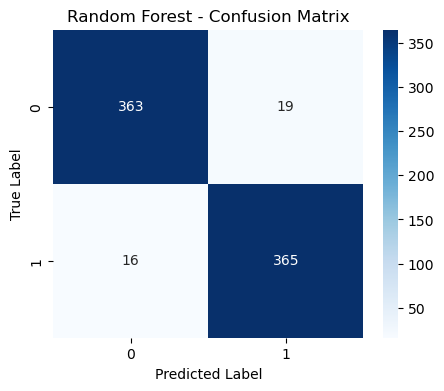

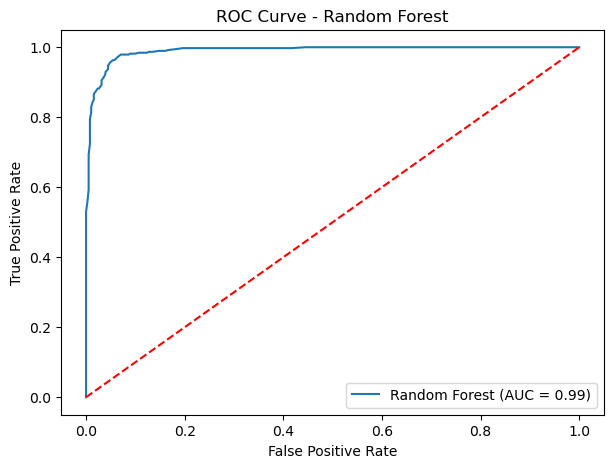

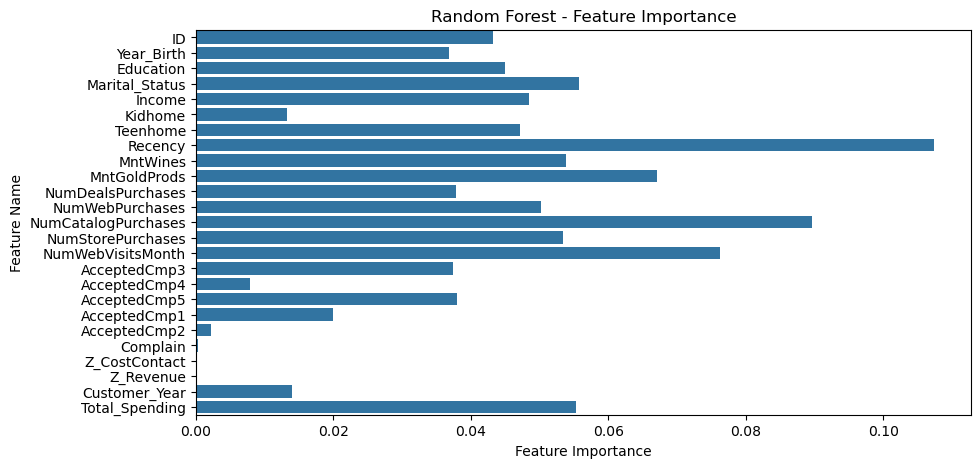

In [138]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# ROC Curve & AUC Score
def plot_roc_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Feature Importance Analysis
def plot_feature_importance(model, X):
    feature_importance = model.feature_importances_
    features = X.columns

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importance, y=features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title("Random Forest - Feature Importance")
    plt.show()

# Run evaluation on the best model (Random Forest)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")
plot_feature_importance(rf_model, X)


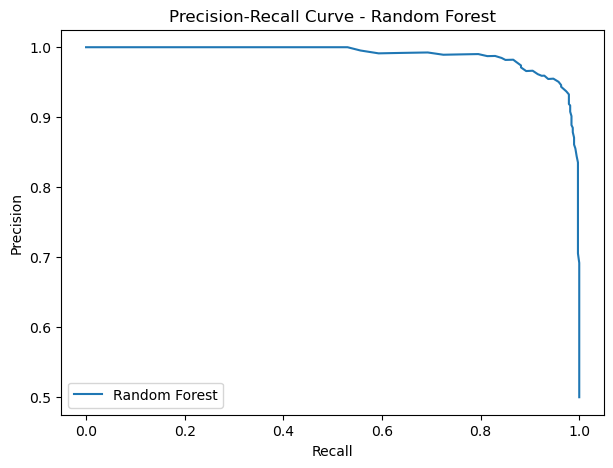

In [142]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    precision, recall, _ = precision_recall_curve(y_test, y_probs)

    plt.figure(figsize=(7, 5))
    plt.plot(recall, precision, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

# Plot for Random Forest
plot_precision_recall_curve(rf_model, X_test, y_test, "Random Forest")


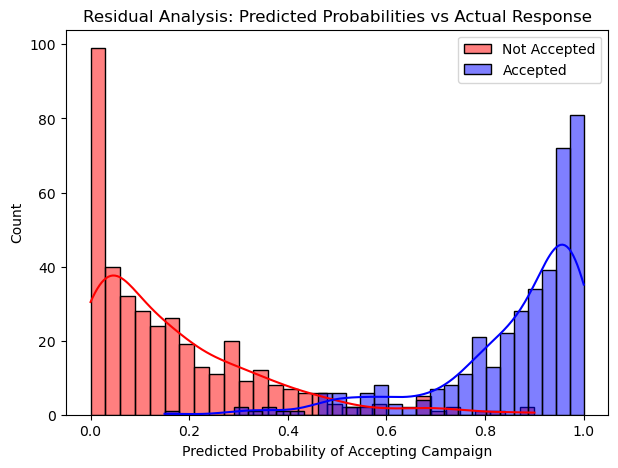

In [146]:
import numpy as np

# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(7, 5))
sns.histplot(y_probs[y_test == 0], color='red', label='Not Accepted', kde=True, bins=30)
sns.histplot(y_probs[y_test == 1], color='blue', label='Accepted', kde=True, bins=30)
plt.xlabel("Predicted Probability of Accepting Campaign")
plt.ylabel("Count")
plt.title("Residual Analysis: Predicted Probabilities vs Actual Response")
plt.legend()
plt.show()


In [148]:
# Create a dataframe with predicted probabilities
df_results = pd.DataFrame({'Actual_Response': y_test, 'Predicted_Prob': y_probs})

# Analyze high-confidence predictions
high_conf_accepted = df_results[(df_results["Predicted_Prob"] > 0.8) & (df_results["Actual_Response"] == 1)]
high_conf_rejected = df_results[(df_results["Predicted_Prob"] < 0.2) & (df_results["Actual_Response"] == 0)]

print(f"Highly confident positive predictions (should be targeted): {len(high_conf_accepted)} customers")
print(f"Highly confident negative predictions (likely non-responders): {len(high_conf_rejected)} customers")


Highly confident positive predictions (should be targeted): 289 customers
Highly confident negative predictions (likely non-responders): 255 customers


### Conclusion  

Through extensive exploratory data analysis and model evaluation, we have successfully built a predictive model that determines customer response to marketing campaigns. The **Random Forest model** demonstrated the best performance, achieving an **AUC score of 0.99**, indicating a high capability to differentiate between responders and non-responders. The confusion matrix revealed a strong classification ability, with minimal misclassifications.  

The feature importance analysis highlighted that **recency of purchase, total spending, and web purchases** play crucial roles in predicting marketing response. Additionally, our residual analysis and probability distributions confirmed that our model effectively separates the two classes. The **precision-recall curve** reinforced that the model maintains high precision across varying recall values, ensuring reliability in real-world applications.  

To optimize marketing efforts, targeting customers with a high predicted probability of response can **increase conversion rates** while reducing unnecessary expenditures on those unlikely to engage. The segmentation of customers into high-confidence positive and negative groups further supports strategic decision-making in personalized marketing campaigns.  

While the model performs exceptionally well, further improvements can be made through fine-tuning hyperparameters, exploring additional feature engineering, and experimenting with deep learning models. Deploying this model in a real-world scenario would allow businesses to make data-driven marketing decisions, ultimately enhancing customer engagement and maximizing return on investment.


### References

Chatgpt<br><br>
Notebooks on Understanding data: 

https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/blob/main/Assignment%201%20Understanding%20Data.ipynb

https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/hp_understanding_data/Understanding_Data/Notebooks_Understanding_Data<br>
<br>https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
<br><br>
H. Wang, C. Ma and L. Zhou, "A Brief Review of Machine Learning and Its Application," 2009 International Conference on Information Engineering and Computer Science, Wuhan, China, 2009, pp. 1-4, doi: 10.1109/ICIECS.2009.5362936. keywords: {Machine learning;Learning systems;Humans;Competitive intelligence;Data engineering;Databases;Data mining;Artificial intelligence;Artificial neural networks;Application software},
<br><br>

Z. Balfagih, "Decoding Cinematic Fortunes: A Machine Learning Approach to Predicting Film Success," 2024 21st Learning and Technology Conference (L&T), Jeddah, Saudi Arabia, 2024, pp. 144-148, doi: 10.1109/LT60077.2024.10468906. keywords: {Solid modeling;Entertainment industry;Machine learning;Production;Predictive models;Data science;Motion pictures;Machine Learning;Movie Success;Box-Office Performance;Data Analysis},

